# Análisis de las observaciones de NuSTAR
---

- ObsID: 30901002002
- Fondo con straylight
- FPM A

## Se importan las librerías necesarias

In [1]:
import xspec as xs
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

## Carga de los datos

In [2]:
data = "src_sl_A_sr.pha"

In [3]:
s = xs.Spectrum(data)


1 spectrum  in use
 
Spectral Data File: src_sl_A_sr.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  6.542e-01 +/- 3.445e-03 (84.8 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-4096
  Telescope: NuSTAR Instrument: FPMA  Channel Type: PI
  Exposure Time: 6.699e+04 sec
 Using fit statistic: chi
 Using Background File                src_sl_A_bk.pha
  Background Exposure Time: 6.699e+04 sec
 Using Response (RMF) File            src_sl_A_sr.rmf for Source 1
 Using Auxiliary Response (ARF) File  src_sl_A_sr.arf



## Seteo de las gráficas

In [6]:
xs.Plot.device = "/null"
xs.Plot.xAxis="keV"
xs.Plot("data")
xs.Plot.setRebin(10,100)
s.ignore("**-3. 79.-**")
energies = xs.Plot.x()
edeltas = xs.Plot.xErr()
rates = xs.Plot.y()
errors = xs.Plot.yErr()
labels = xs.Plot.labels()

    35 channels (1-35) ignored in spectrum #     1
  2162 channels (1935-4096) ignored in spectrum #     1



## Gráfica del "espectro"

<ErrorbarContainer object of 3 artists>

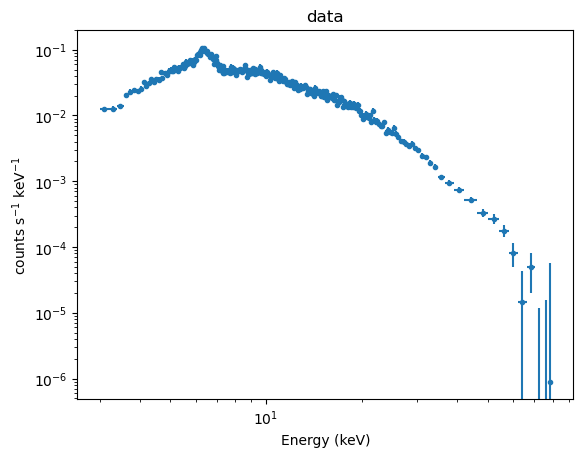

In [7]:
plt.xscale('log')
plt.yscale('log')
plt.xlabel(labels[0])
plt.ylabel(labels[1])
plt.title(labels[2])
plt.errorbar(energies,rates,xerr=edeltas,yerr=errors,fmt='.')

In [8]:
m = xs.Model("phabs*(gauss + po + bremss + bb)")


Model phabs<1>(gaussian<2> + powerlaw<3> + bremss<4> + bbody<5>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   phabs      nH         10^22    1.00000      +/-  0.0          
   2    2   gaussian   LineE      keV      6.50000      +/-  0.0          
   3    2   gaussian   Sigma      keV      0.100000     +/-  0.0          
   4    2   gaussian   norm                1.00000      +/-  0.0          
   5    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   6    3   powerlaw   norm                1.00000      +/-  0.0          
   7    4   bremss     kT         keV      7.00000      +/-  0.0          
   8    4   bremss     norm                1.00000      +/-  0.0          
   9    5   bbody      kT         keV      3.00000      +/-  0.0          
  10    5   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Sq

In [12]:
xs.Fit.perform()

                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH       2:LineE       3:Sigma        4:norm    5:PhoIndex        6:norm          7:kT        8:norm          9:kT       10:norm
2773.79      5867.58       0       21.0557       6.39711      0.295363   0.000195714       9.50000       40.0795       4.41588    0.00914687       5.26255   0.000794480
2773.02      2391.92       0       21.0919       6.39700      0.295493   0.000196060       9.50000       38.1594       4.41828    0.00914918       5.26148   0.000795021
2772.7       945.173       0       21.1154       6.39687      0.295637   0.000196235       9.50000       36.9669       4.41998    0.00915419       5.26137   0.000795288
2772.56      285.537       0       21.1318       6.39677      0.295740   0.000196308       9.50000       36.2191       4.42125    0.00916043       5.26167   0.000795420
2772.48      121.735       0       21.1442       6.39671      0.295785   0.000196320       9.50000       35.7

In [10]:
xs.Plot("data resid")
energies = xs.Plot.x()
edeltas = xs.Plot.xErr()
rates = xs.Plot.y(1,1)
errors = xs.Plot.yErr(1,1)
foldedmodel = xs.Plot.model()
dataLabels = xs.Plot.labels(1)
residLabels = xs.Plot.labels(2)
# note that for matplotlib step plots we need an x-axis array which includes the start and end value for each
# bin and the y-axis has to be the same size with an extra value added equal to the value of the last bin
nE = len(energies)
stepenergies = list()
for i in range(nE):
    stepenergies.append(energies[i] - edeltas[i])
stepenergies.append(energies[-1]+edeltas[-1])
foldedmodel.append(foldedmodel[-1])
resid = xs.Plot.y(1,2)
residerr = xs.Plot.yErr(1,2)

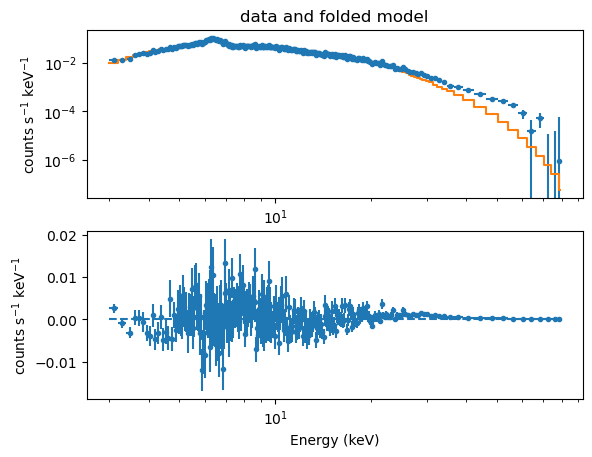

In [11]:
plt.subplot(211)
plt.xscale('log')
plt.yscale('log')
plt.ylabel(dataLabels[1])
plt.title(dataLabels[2])
plt.errorbar(energies,rates,xerr=edeltas,yerr=errors,fmt='.')
plt.step(stepenergies,foldedmodel,where='post')
plt.subplot(212)
plt.xscale('log')
plt.xlabel(residLabels[0])
plt.ylabel(residLabels[1])
plt.errorbar(energies,resid,xerr=edeltas,yerr=residerr,fmt='.')
plt.hlines(0.0,stepenergies[0],stepenergies[-1],linestyles='dashed')